# Load data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('vietnam_housing_dataset.csv')
df.sample(5)

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
21805,"Đường Láng, Phường Láng Thượng, Đống Đa, Hà Nội",48.0,6.00,3.0,NaN,NaN,4.0,NaN,NaN,Have certificate,Full,8.40
637,"Đường Số 5, Phường Linh Chiểu, Thủ Đức, Hồ Chí...",61.0,NaN,3.0,NaN,NaN,1.0,2.0,1.0,NaN,NaN,4.15
6480,"Đường Yên Lũng, Xã An Khánh, Hoài Đức, Hà Nội",30.2,3.63,2.5,Đông - Nam,NaN,5.0,3.0,4.0,Have certificate,Basic,4.30
1563,"Đường Tân Thới Nhất 12, Phường Tân Thới Nhất, ...",88.0,8.00,8.0,Tây - Nam,Tây - Nam,3.0,4.0,5.0,Have certificate,Full,7.60
28455,"Đường Nguyễn Văn Luông, Phường 11, Quận 6, Hồ ...",45.0,4.00,3.5,Tây - Bắc,NaN,2.0,2.0,2.0,Have certificate,NaN,4.59


Column Descriptions:

- Address: The complete address of the property, including details such as the project name, street, ward, district, and city.
- Area: The total area of the property, measured in square meters.
- Frontage: The width of the front side of the property, measured in meters.
- Access Road: The width of the road providing access to the property, measured in meters.
- House Direction: The cardinal direction the front of the house is facing (e.g- .,-  East, West, North, South).
- Balcony Direction: The cardinal direction the balcony is facing.
- Floors: The total number of floors in the property.
- Bedrooms: The number of bedrooms in the property.
- Bathrooms: The number of bathrooms in the property.
- Legal Status: Indicates the legal status of the property, such as whether it has a certificate of ownership or is under a sale contract.
- Furniture State: Indicates the state of furnishing in the property, such as fully furnished, partially furnished, or unfurnished.
- Price: The price of the property, represented in billions of Vietnamese Dong (VND).- 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


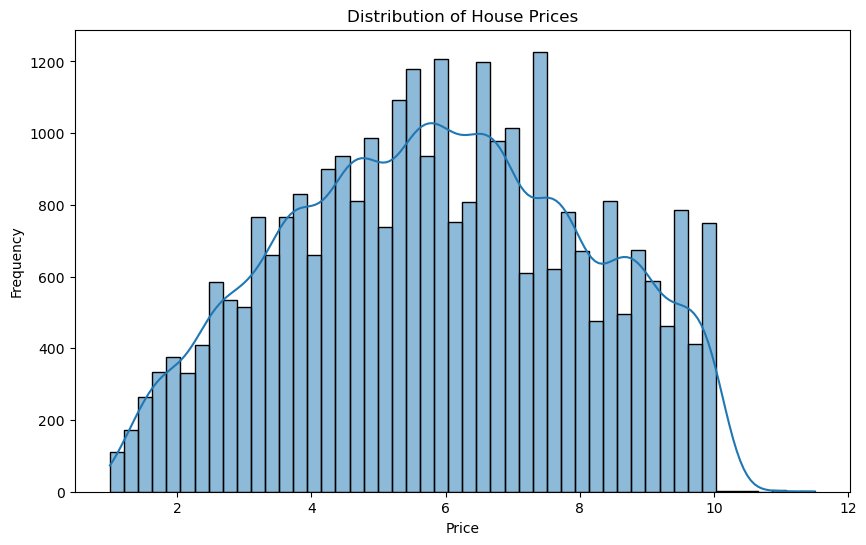

In [3]:
# Plot the distribution of the prices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Preprocess data

## Numerical data

In [4]:
# First, let's filter out the numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns.tolist()
print(numerical_columns)

['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms', 'Price']


In [5]:
df[numerical_columns].isna().sum()

Area               0
Frontage       11564
Access Road    13297
Floors          3603
Bedrooms        5162
Bathrooms       7074
Price              0
dtype: int64

In [6]:
# Check unique values in each columns
import random
import math
import numpy as np

def get_unique_values(col):
    values = df[col].unique()
    result = []
    if(len(values) >= 10):
        if(any(math.isnan(x) for x in values)) :
            result.append(np.nan)
        unique_indexs = random.sample(range(0,len(values)), 10)
        for index in unique_indexs:
            if not math.isnan(values[index]):
                result.append(values[index])
    else:
        result = values
    return set(result)

for col in numerical_columns:
    print(f'Unique values in {col} column look like: {get_unique_values(col)}')

Unique values in Area column look like: {np.float64(128.8), np.float64(268.0), np.float64(242.0), np.float64(53.2), np.float64(87.75), np.float64(87.1), np.float64(54.4), np.float64(21.3), np.float64(60.4), np.float64(61.9)}
Unique values in Frontage column look like: {np.float64(3.6), np.float64(4.26), np.float64(4.59), np.float64(6.82), np.float64(7.1), np.float64(8.06), np.float64(3.93), np.float64(10.3), np.float64(5.6), np.float64(4.3), nan}
Unique values in Access Road column look like: {np.float64(32.0), np.float64(2.1), np.float64(4.7), np.float64(5.5), np.float64(10.5), np.float64(12.5), np.float64(46.0), np.float64(15.5), nan, np.float64(53.0), np.float64(21.5)}
Unique values in Floors column look like: {np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(9.0), np.float64(10.0), nan}
Unique values in Bedrooms column look like: {np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.f

In [7]:
'''
We can see that in some columns we get the nan value  . 
In this situation , we assume that :
- Frontage nan means the house get no frontage .
- Access Road nan means the house get no Access Road .
- Floors nan means the house get 1 Floors .
- Bedrooms nan means the house get 1 Bedrooms .
- Bathrooms nan means the house get 1 Bathrooms .
''' 

# So let's fill N/A values
df['Frontage'].fillna(0,inplace=True)
df['Access Road'].fillna(0,inplace=True)
df['Floors'].fillna(1,inplace=True)
df['Bedrooms'].fillna(1,inplace=True)
df['Bathrooms'].fillna(1,inplace=True)

for col in numerical_columns:
    print(f'Unique values in {col} column look like: {get_unique_values(col)}')
print(df[numerical_columns].info())


Unique values in Area column look like: {np.float64(225.0), np.float64(38.7), np.float64(81.5), np.float64(178.0), np.float64(83.2), np.float64(20.0), np.float64(25.6), np.float64(442.0), np.float64(93.8), np.float64(62.2)}
Unique values in Frontage column look like: {np.float64(4.8), np.float64(5.03), np.float64(4.85), np.float64(7.7), np.float64(39.0), np.float64(7.91), np.float64(7.45), np.float64(4.04), np.float64(5.2), np.float64(13.96)}
Unique values in Access Road column look like: {np.float64(1.8), np.float64(2.7), np.float64(34.0), np.float64(4.6), np.float64(2.9), np.float64(6.6), np.float64(10.44), np.float64(15.3), np.float64(48.0), np.float64(61.0)}
Unique values in Floors column look like: {np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0)}
Unique values in Bedrooms column look like: {np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np

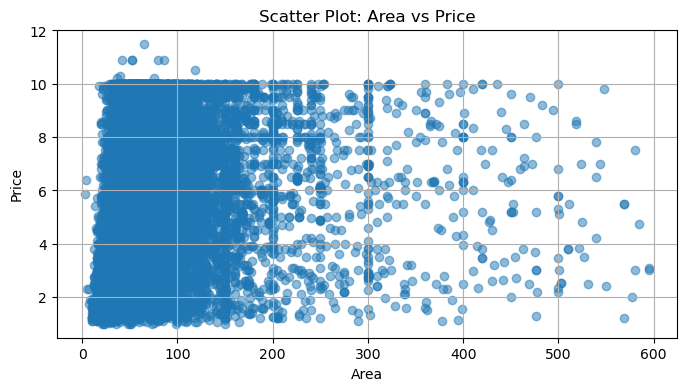

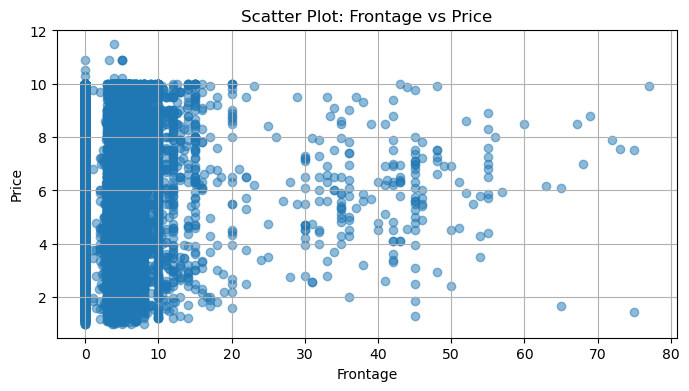

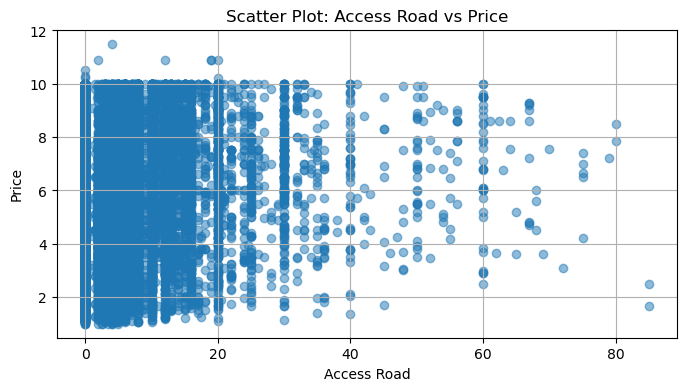

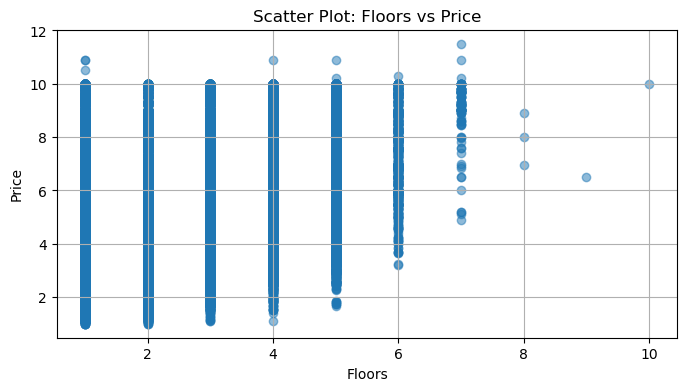

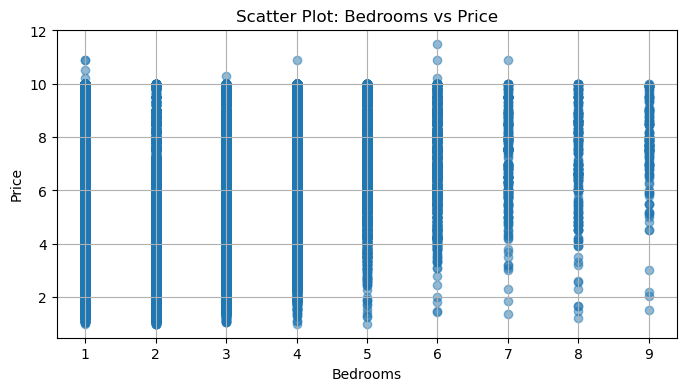

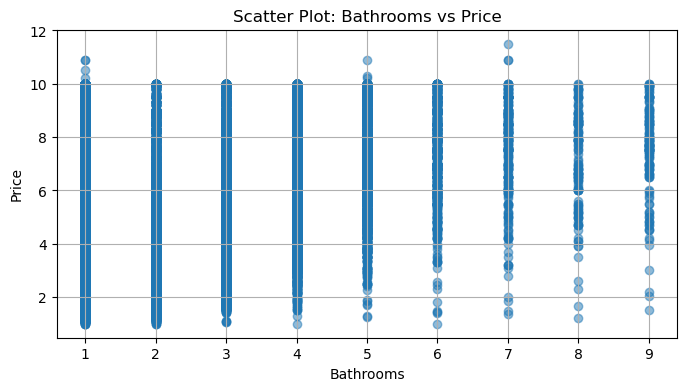

In [8]:
# Now we can check if any outliers here
numerical_columns_droped_Price = numerical_columns.copy()
numerical_columns_droped_Price.remove('Price')

import matplotlib.pyplot as plt
for feature in numerical_columns_droped_Price:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[feature], df['Price'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

# Look at all these plot , we can see some outliers here 
# Eg : In Area vs Price , some outliers are above 10 bilion VND , or some outliers got more than 500 m2 but just less than 2 bilions VND . So on ...

In [9]:
# Process outliers
print(f'Before filtering : {df.shape}')

# In this situation we will use the InterQuartile range method to detect and remove all outliers
# IQR = Q3 - Q1 (75th percentile - 25th percentile).
# Outliers are typically points below Q1 - 1.5IQR or above Q3 + 1.5IQR.
# Caculate the Q1,Q3 and IQR

def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    final_df = df[~((df[column] < Q1-1.5*IQR) | (df[column] > Q3+1.5*IQR) )]
    return final_df

for col in numerical_columns:
    df = remove_outliers(df,col)
df.reset_index()
print(f'After removing outliers : {df.shape}')


Before filtering : (30229, 12)
After removing outliers : (26744, 12)


In [10]:
# Now we can add some creative features to capture the additional information and improve the predictive power of our models .

# Linear features
df['TotalRoom'] = df['Bedrooms'] + df['Bathrooms']
df['AreaPerRoom'] = df['Area'] / df['TotalRoom']
df['ConvenientOfBedrooms'] = df['Bathrooms'] / df['Bedrooms'] # Maybe more bathrooms per bedroom is better
df['AreaPerFloor'] = df['Area'] / df['Floors']
df['RoomPerFloor'] = df['TotalRoom'] / df['Floors']
df['IsMultiStory'] = (df['Floors']>1).astype(int)

# Non-linear features (Use logarit distribution or square data , as logarit distribution will perform with some extreme)
df['LogArea'] = np.log(df['Area'])
df['LogFrontage'] = np.log1p(df['Frontage']) # log1p = log(1+values) cause Frontage data had 0 values
df['LogAccessRoad'] = np.log1p(df['Access Road'])
df['AreaSquared'] = df['Area'] ** 2
df['FrontageSquared'] = df['Frontage'] ** 2
df['AccessRoadSquared'] = df['Access Road'] ** 2

In [11]:
df.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price,TotalRoom,AreaPerRoom,ConvenientOfBedrooms,AreaPerFloor,RoomPerFloor,IsMultiStory,LogArea,LogFrontage,LogAccessRoad,AreaSquared,FrontageSquared,AccessRoadSquared
count,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000,26744.000000
mean,58.857858,2.795718,3.186412,3.192679,3.018546,2.750037,5.806226,5.768584,13.779242,0.938990,27.232473,2.076186,0.836935,3.986768,1.029424,0.985690,4094.594985,13.906667,24.486904
std,25.107192,2.467966,3.786056,1.451765,1.381888,1.471895,2.179982,2.657468,11.454895,0.307508,25.560209,1.169841,0.369432,0.423128,0.851012,0.972631,3566.686945,16.152246,43.214070
min,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.666667,0.142857,1.333333,0.285714,0.000000,1.386294,0.000000,0.000000,16.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,2.000000,2.000000,1.000000,4.150000,4.000000,6.111111,0.750000,10.000000,1.500000,1.000000,3.688879,0.000000,0.000000,1600.000000,0.000000,0.000000
50%,53.000000,3.800000,2.500000,3.000000,3.000000,3.000000,5.800000,6.000000,9.500000,1.000000,17.666667,2.000000,1.000000,3.970292,1.568616,1.252763,2809.000000,14.440000,6.250000
75%,75.000000,4.500000,5.000000,4.000000,4.000000,4.000000,7.500000,8.000000,17.000000,1.000000,33.400000,2.400000,1.000000,4.317488,1.704748,1.791759,5625.000000,20.250000,25.000000
max,140.000000,12.000000,15.000000,7.000000,7.000000,8.000000,11.500000,15.000000,70.000000,8.000000,140.000000,14.000000,1.000000,4.941642,2.564949,2.772589,19600.000000,144.000000,225.000000


We notice that Area, AreaSquared,AccessFloorSquared are wide ranges , whereas Frontage , Floors and Bedrooms are small ranges . So in the training progress we will use StandardScaler to scale the data , based on that we want to use LinearRegression , KNN Regression , RandomForest and NeuralNetwork to train the data

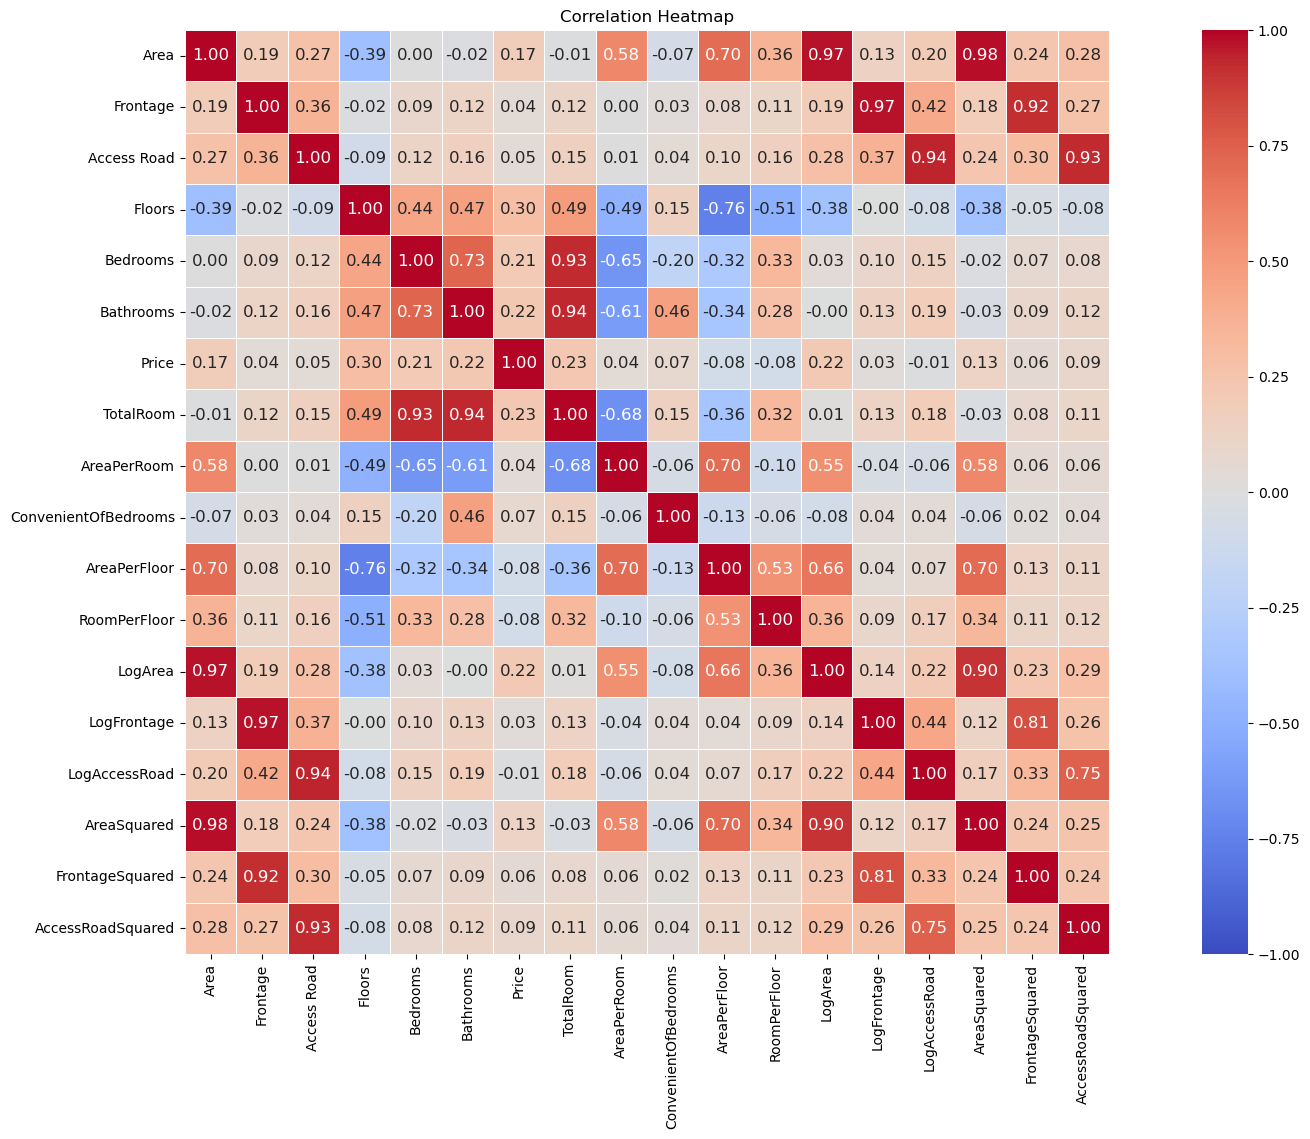

In [12]:
numerical_columns = df.select_dtypes(include=['float64']).columns.tolist()
# Let's check the correlations between numerical features in the dataset
corr_matrix = df[numerical_columns].corr()

# Watch the corr matrix in heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24,12))

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0,square=True,linewidths=0.5,annot_kws={'size': 12},fmt = '.2f') # Just draw heatmap , don't ask me anything 
plt.title('Correlation Heatmap')
plt.show()

Because the indices are not too biased towards any features , we will use all these features for training models .

## Categorical data

In [13]:
# First let's check our missing values
df.isnull().sum()

Address                     0
Area                        0
Frontage                    0
Access Road                 0
House direction         19449
Balcony direction       22639
Floors                      0
Bedrooms                    0
Bathrooms                   0
Legal status             3958
Furniture state         12152
Price                       0
TotalRoom                   0
AreaPerRoom                 0
ConvenientOfBedrooms        0
AreaPerFloor                0
RoomPerFloor                0
IsMultiStory                0
LogArea                     0
LogFrontage                 0
LogAccessRoad               0
AreaSquared                 0
FrontageSquared             0
AccessRoadSquared           0
dtype: int64

In [14]:
object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns_without_Address = object_columns.copy()
object_columns_without_Address.remove('Address')
for col in object_columns_without_Address:
    print(f'The unique values in {col} are : {df[col].unique()}')

The unique values in House direction are : [nan 'Đông - Bắc' 'Tây - Nam' 'Đông - Nam' 'Tây - Bắc' 'Nam' 'Bắc' 'Tây'
 'Đông']
The unique values in Balcony direction are : [nan 'Đông - Bắc' 'Tây - Nam' 'Đông - Nam' 'Đông' 'Tây - Bắc' 'Bắc' 'Nam'
 'Tây']
The unique values in Legal status are : ['Have certificate' nan 'Sale contract']
The unique values in Furniture state are : [nan 'Full' 'Basic']


In [15]:
# We will throw both House direction column and Balcony direction , cause we can't assume any data to them and the null values get more than 2/3 dataset.
df.drop(columns=['House direction','Balcony direction'],inplace=True)

# We assume that the nan values in Legal status mean unknown, and nan values in Furniture mean these house have no furniture
df['Legal status'].fillna('Unknown',inplace=True)
df['Furniture state'].fillna('None',inplace=True)
print('Fill N/A values successfully.')

Fill N/A values successfully.


In [16]:
df.isnull().sum()

Address                 0
Area                    0
Frontage                0
Access Road             0
Floors                  0
Bedrooms                0
Bathrooms               0
Legal status            0
Furniture state         0
Price                   0
TotalRoom               0
AreaPerRoom             0
ConvenientOfBedrooms    0
AreaPerFloor            0
RoomPerFloor            0
IsMultiStory            0
LogArea                 0
LogFrontage             0
LogAccessRoad           0
AreaSquared             0
FrontageSquared         0
AccessRoadSquared       0
dtype: int64

In [17]:
# Look at the Address data form , we notice that the province values often appear in the last of the sentences.
pd.set_option('display.max_colwidth', None)
df['Address'].sample(10)

13773           Đường Hoàng Như Tiếp, Phường Bồ Đề, Long Biên, Hà Nội
4665               Đường Tây Sơn, Phường Ngã Tư Sở, Đống Đa, Hà Nội
4241             Đường Ngọc Trục, Phường Đại Mỗ, Nam Từ Liêm, Hà Nội.
15883                Đường Lê Đức Thọ, Phường 15, Gò Vấp, Hồ Chí Minh
12569               Đường Thụy Khuê, Phường Thụy Khuê, Tây Hồ, Hà Nội
16813      Đường Mã Lò, Phường Bình Trị Đông A, Bình Tân, Hồ Chí Minh
26299               Đường Thành Thái, Phường 14, Quận 10, Hồ Chí Minh
19466    Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận 9, Hồ Chí Minh
7886                     Đường Yên Bệ, Xã Kim Chung, Hoài Đức, Hà Nội
24143        Đường Lê Thị Riêng, Phường Thới An, Quận 12, Hồ Chí Minh
Name: Address, dtype: object

In [18]:
# So we can extract these data to a new column , as it can be a critical feature
def get_province(x):
    x = x.rstrip('.') # Remove trailing dot
    arr = x.split(',') # Split by comma
    return arr[-1]
df['province'] = df['Address'].apply(get_province)
print(df['province'].unique())

[' Hưng Yên' ' Hồ Chí Minh' ' Bình Dương' ' Hà Nội' ' Long An'
 ' Bình Thuận' ' Hà Nam' ' Bà Rịa Vũng Tàu' ' Hồ Chí Minh giá 2tỷ380'
 ' Khánh Hòa' ' Đà Nẵng' ' Thái Nguyên' ' Hải Phòng' ' Quảng Trị'
 ' Thanh Hóa' ' Bắc Ninh' ' Đồng Nai' ' Ninh Thuận' ' Quảng Ninh'
 ' Cần Thơ' ' Thái Bình' ' Bắc Giang' ' Lâm Đồng' ' Kiên Giang'
 ' Quảng Nam' ' Thừa Thiên Huế' ' Bình Định' ' Tiền Giang' ' Đắk Lắk'
 ' Hải Dương' ' Phú Thọ' ' Lạng Sơn' ' Hà Nội' ' Nghệ An' ' Sơn La'
 ' Hòa Bình' ' Vĩnh Phúc' ' Lào Cai' ' Gia Lai' 'Đường số 11' ' Bến Tre'
 ' Quận Bình Thạnh' ' An Giang' ' TPHCM' ' Tây Ninh'
 'Phòng công chứng Nguyễn Thị Thành' ' Quảng Ngãi' ' Hà Giang' ' HN'
 ' Nam Định' ' Điện Biên' ' Hà Tĩnh' ' Yên Bái' ' Ninh Bình' ' Cà Mau'
 'Bán nhà chính chủ Phó Đức Chính khu Bà Chiểu - trung tâm Bình Thạnh giá cực tốt'
 ' TP. HCM' ' Phú Yên' ' giá 6ty' ' Sóc Trăng' ' Hậu Giang' ' Đồng Tháp'
 ' Vĩnh Long' '' ' Hồ Chí Mính' ' Quận Nam Từ Liêm' ' Quận 8'
 ' TP Hồ Chí Minh' ' Bình Phước' ' TP. Cam Ranh

In [19]:
# These data has some weird values , cause some of them are incorrect format . But its oke , I'll fill them mannualy with my super high level knowledge.
df['province'] = df['province'].replace(' Hồ Chí Minh giá 2tỷ380',' Hồ Chí Minh')
df['province'] = df['province'].replace('Đường số 11',' Hồ Chí Minh')
df['province'] = df['province'].replace('Phòng công chứng Nguyễn Thị Thành',' Hồ Chí Minh')
df['province'] = df['province'].replace(' HN',' Hà Nội')
df['province'] = df['province'].replace('Bán nhà chính chủ Phó Đức Chính khu Bà Chiểu - trung tâm Bình Thạnh giá cực tốt',' Hồ Chí Minh')
df['province'] = df['province'].replace(' giá 6ty',' Hồ Chí Minh')
df['province'] = df['province'].replace('',' Hà Nội')
df['province'] = df['province'].replace(' Quận 8',' Hồ Chí Minh')
df['province'] = df['province'].replace(' TPHCM',' Hồ Chí Minh')
df['province'] = df['province'].replace(' TpHCM',' Hồ Chí Minh')
df['province'] = df['province'].replace(' TP. HCM',' Hồ Chí Minh')
df['province'] = df['province'].replace(' Bình Dương (gần cafe Xóm Vắng 2)',' Bình Dương')
df['province'] = df['province'].replace(' Quận Nam Từ Liêm',' Hà Nội')
df['province'] = df['province'].replace(' Quảng Ninh (Ngã 3 đường Hòn Gai cũ)',' Quảng Ninh')
df['province'] = df['province'].replace(' TP. Cam Ranh',' Khánh Hòa')
df['province'] = df['province'].replace(' Quận Bình Thạnh',' Hồ Chí Minh')
df['province'] = df['province'].replace(' Hồ Chí Mính',' Hồ Chí Minh')
df['province'] = df['province'].replace(' TP Hồ Chí Minh',' Khánh Hòa')

In [20]:
print(df['province'].unique())
# There we go

[' Hưng Yên' ' Hồ Chí Minh' ' Bình Dương' ' Hà Nội' ' Long An'
 ' Bình Thuận' ' Hà Nam' ' Bà Rịa Vũng Tàu' ' Khánh Hòa' ' Đà Nẵng'
 ' Thái Nguyên' ' Hải Phòng' ' Quảng Trị' ' Thanh Hóa' ' Bắc Ninh'
 ' Đồng Nai' ' Ninh Thuận' ' Quảng Ninh' ' Cần Thơ' ' Thái Bình'
 ' Bắc Giang' ' Lâm Đồng' ' Kiên Giang' ' Quảng Nam' ' Thừa Thiên Huế'
 ' Bình Định' ' Tiền Giang' ' Đắk Lắk' ' Hải Dương' ' Phú Thọ' ' Lạng Sơn'
 ' Hà Nội' ' Nghệ An' ' Sơn La' ' Hòa Bình' ' Vĩnh Phúc' ' Lào Cai'
 ' Gia Lai' ' Bến Tre' ' An Giang' ' Tây Ninh' ' Quảng Ngãi' ' Hà Giang'
 ' Nam Định' ' Điện Biên' ' Hà Tĩnh' ' Yên Bái' ' Ninh Bình' ' Cà Mau'
 ' Phú Yên' ' Sóc Trăng' ' Hậu Giang' ' Đồng Tháp' ' Vĩnh Long'
 ' Bình Phước' ' Trà Vinh']


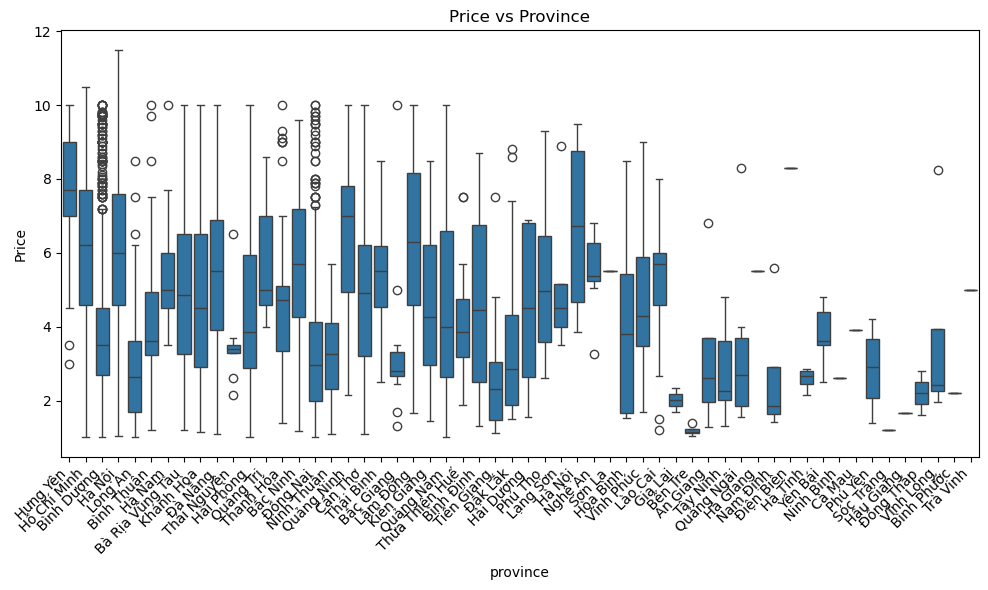

In [21]:
# Create the box plot for Price vs Province
plt.figure(figsize=(10, 6))
sns.boxplot(x='province', y='Price', data=df)
plt.title('Price vs Province')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns_without_Address = object_columns.copy()
object_columns_without_Address.remove('Address')
# We will drop the 'Address' column as it is not needed anymore
df.drop(columns=['Address'], inplace=True)

# Let's one hot encode the categorical columns
df = pd.get_dummies(df, columns=object_columns_without_Address, drop_first=True) # use drop_first=True for models like linear regression to avoid the dummy variable trap and multicollinearity
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 0 to 30228
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area                        26744 non-null  float64
 1   Frontage                    26744 non-null  float64
 2   Access Road                 26744 non-null  float64
 3   Floors                      26744 non-null  float64
 4   Bedrooms                    26744 non-null  float64
 5   Bathrooms                   26744 non-null  float64
 6   Price                       26744 non-null  float64
 7   TotalRoom                   26744 non-null  float64
 8   AreaPerRoom                 26744 non-null  float64
 9   ConvenientOfBedrooms        26744 non-null  float64
 10  AreaPerFloor                26744 non-null  float64
 11  RoomPerFloor                26744 non-null  float64
 12  IsMultiStory                26744 non-null  int64  
 13  LogArea                     26744 no

Text(0.5, 0, 'Price')

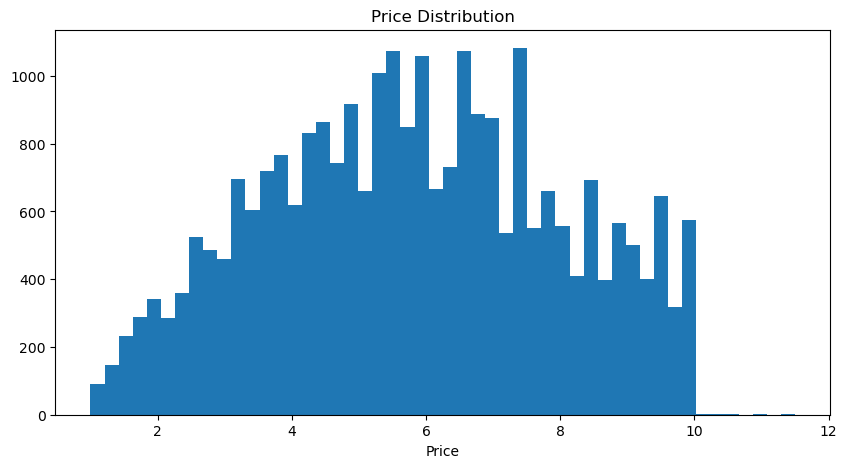

In [23]:
# Let's take a look at the price plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['Price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')

# Models

In this project we will use 4 type of models :
- LinearRegression (Ridge,Lasso)
- DecisionTree (RandomForest,XGBoost)
- KNearestNeighbors
- NeuralNetwork

So to compare their performance , we will evaluate based on these criterias:
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R2 Score
- Time

We also use GridSearch and RandomizedSearch to find out the best param for the algorithm

In [24]:
# Get the common data
X = df.drop(columns=['Price'])
y = df['Price']
print(X.shape,y.shape)

(26744, 77) (26744,)


With more than 25000 samples , we will use cross validation to evaluate performance of all models. 

## Linear Regression

### Simple Linear Regression

In [25]:
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time
import numpy as np

# Define pipeline
linear_model = Pipeline([
    ('scaler',StandardScaler()),
    ('regressor',LinearRegression())
])

# Cross validation
linear_cv = KFold(n_splits=5,shuffle=True,random_state=42) # shuffle data with repeatable result to compare models.

# Caculate time to predict 5 folds
start_time = time.time()
linear_pred = cross_val_predict(linear_model,X,y,cv=linear_cv) # This isn't training all samples and then predicting , but predicting each fold
train_time = time.time() - start_time                   # like a real situation .

# Caculate metrics
linear_rmse = np.sqrt(mean_squared_error(y,linear_pred))
linear_mae = mean_absolute_error(y,linear_pred)
linear_r2 = r2_score(y,linear_pred)

print(f"Train time: {train_time:.2f} seconds")
print(f"Linear RMSE: {linear_rmse:.4f}")
print(f"Linear MAE: {linear_mae:.4f}")
print(f"Linear R²: {linear_r2:.4f}")


Train time: 0.34 seconds
Linear RMSE: 1.6186
Linear MAE: 1.2833
Linear R²: 0.4487


Let's see if Ridge Regression and Lasso Regression perform better or not 

### Ridge Regression 

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Define
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Grid Search
ridge_param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Find the best alpha
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=ridge_cv, scoring='neg_mean_squared_error') # Assign negative MSE for evaluation criteria
                                                                                          # as scikit_learn only supports maximum
start_time = time.time()
ridge_grid_search.fit(X, y)
train_time = time.time() - start_time

best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_alpha = ridge_grid_search.best_params_['regressor__alpha']

# Predict data
ridge_pred = cross_val_predict(best_ridge_model, X, y, cv=ridge_cv)

# Caculate metrics
ridge_rmse = np.sqrt(mean_squared_error(y, ridge_pred))
ridge_mae = mean_absolute_error(y, ridge_pred)
ridge_r2 = r2_score(y, ridge_pred)

# Print results
print(f"Best ridge alpha: {best_ridge_alpha}")
print(f"Train time: {train_time:.2f} seconds")
print(f"Ridge RMSE: {ridge_rmse:.4f}")
print(f"Ridge MAE: {ridge_mae:.4f}")
print(f"Ridge R²: {ridge_r2:.4f}")


Best ridge alpha: 0.01
Train time: 1.47 seconds
Ridge RMSE: 1.6186
Ridge MAE: 1.2833
Ridge R²: 0.4487


### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Define pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

# Grid Search
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1 , 10]
}

lasso_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Find the best alpha
lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=lasso_cv, scoring='neg_mean_squared_error') # Assign negative MSE for evaluation criteria
                                                                                          # as scikit_learn only supports maximum
start_time = time.time()
lasso_grid_search.fit(X, y)
train_time = time.time() - start_time

best_lasso_model = lasso_grid_search.best_estimator_
best_lasso_alpha = lasso_grid_search.best_params_['regressor__alpha']

# Predict data
lasso_pred = cross_val_predict(best_lasso_model, X, y, cv=lasso_cv)

# Caculate metrics
lasso_rmse = np.sqrt(mean_squared_error(y, lasso_pred))
lasso_mae = mean_absolute_error(y, lasso_pred)
lasso_r2 = r2_score(y, lasso_pred)

# Print results
print(f"Best alpha: {best_lasso_alpha}")
print(f"Train time: {train_time:.2f} seconds")
print(f"RMSE: {lasso_rmse:.4f}")
print(f"MAE: {lasso_mae:.4f}")
print(f"R²: {lasso_r2:.4f}")


Best alpha: 0.001
Train time: 56.17 seconds
RMSE: 1.6191
MAE: 1.2845
R²: 0.4483


We can see that Lasso has much more time to train compared with Ridge , cause :
-  Lasso uses L1 regularization which can zero out coefficients completely. This makes the optimization problem non-differentiable at zero and more computationally complex than Ridge's L2 regularization.
- Smaller alpha values in Lasso require more iterations to converge.

## Decision Tree

### Decision Tree 

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Define pipeline
decitiontree_model = DecisionTreeRegressor()

# Grid Search
param_distributions = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['squared_error']
}

DecisionTree_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Find the best alpha
DecisionTree_random_search = RandomizedSearchCV(
    estimator=decitiontree_model,
    param_distributions=param_distributions,
    n_iter=30,  # Number of random test combinations
    cv=DecisionTree_cv,
    verbose=1,
    n_jobs=-1,  # Use all CPU cores (In this case I use Intel(R) Core(TM) i7-14700K)
    scoring='neg_mean_squared_error',
    random_state=42
)
start_time = time.time()
DecisionTree_random_search.fit(X, y)
train_time = time.time() - start_time

best_decision_tree_model = DecisionTree_random_search.best_estimator_
best_decision_tree_params = DecisionTree_random_search.best_params_

# Predict data
decision_tree_pred = cross_val_predict(best_decision_tree_model, X, y, cv=DecisionTree_cv)

# Caculate metrics
decision_tree_rmse = np.sqrt(mean_squared_error(y, decision_tree_pred))
decision_tree_mae = mean_absolute_error(y, decision_tree_pred)
decision_tree_r2 = r2_score(y, decision_tree_pred)

# Print results
print(f"Best params: {best_decision_tree_params}")
print(f"Train time: {train_time:.2f} seconds")
print(f"RMSE: {decision_tree_rmse:.4f}")
print(f"MAE: {decision_tree_mae:.4f}")
print(f"R²: {decision_tree_r2:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'min_samples_split': 20, 'min_samples_leaf': 8, 'max_depth': 10, 'criterion': 'squared_error'}
Train time: 5.11 seconds
RMSE: 1.6542
MAE: 1.2945
R²: 0.4242


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_validate
import numpy as np
import time

# Define pipeline
randomforest_model = RandomForestRegressor(random_state=42)

# Grid Search
param_distributions_rf = {
    'n_estimators': [100, 200, 300],         
    'max_depth': [10, 20, 30, None],        
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['sqrt', 'log2'],       
}

RandomForest_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Find the best parameters
RandomForest_random_search = RandomizedSearchCV(
    estimator=randomforest_model,
    param_distributions=param_distributions_rf,
    n_iter=30,
    cv=RandomForest_cv,
    verbose=1,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Time the training
start_time = time.time()
RandomForest_random_search.fit(X, y)
train_time = time.time() - start_time

# Get the best model and parameters
best_random_forest_model = RandomForest_random_search.best_estimator_
best_random_forest_params = RandomForest_random_search.best_params_

# Evaluate using cross_validate to get proper metrics without retraining
cv_results = cross_validate(
    best_random_forest_model, 
    X, y, 
    cv=RandomForest_cv,
    scoring={
        'neg_mse': 'neg_mean_squared_error',
        'neg_mae': 'neg_mean_absolute_error',
        'r2': 'r2'
    },
    n_jobs=-1
)

# Calculate metrics
random_forest_rmse = np.sqrt(-cv_results['test_neg_mse'].mean())
random_forest_mae = -cv_results['test_neg_mae'].mean()
random_forest_r2 = cv_results['test_r2'].mean()

# Print results
print(f"Best params: {best_random_forest_params}")
print(f"Train time: {train_time:.2f} seconds")
print(f"RMSE: {random_forest_rmse:.4f}")
print(f"MAE: {random_forest_mae:.4f}")
print(f"R²: {random_forest_r2:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Train time: 47.84 seconds
RMSE: 1.5454
MAE: 1.2183
R²: 0.4973


### XGBoost

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_validate
import numpy as np
import time

# Define pipeline
xgboost_model = XGBRegressor(random_state=42)

# Grid Search
param_distributions_xgb = {
    'n_estimators': [100, 200, 300, 500], # Number of trees
    'max_depth': [3, 5, 7, 10], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0], # Each tree will get (subsample) entire rows data to train
    'colsample_bytree': [0.6, 0.8, 1.0], # Same as subsample but with columns
    'gamma': [0, 1, 5], # Minimum loss reduction required to make a split.
    'reg_alpha': [0, 0.1, 1], # L1 regularization (Lasso) on weights.
    'reg_lambda': [1, 1.5, 2] #  L2 regularization (Ridge) on weights.
}

XGBoost_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Find the best parameters
XGBoost_random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_distributions_xgb,
    n_iter=30, 
    cv=XGBoost_cv,
    verbose=1,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Time the training
start_time = time.time()
XGBoost_random_search.fit(X, y)
train_time = time.time() - start_time

# Get the best model and parameters
best_xgboost_model = XGBoost_random_search.best_estimator_
best_xgboost_params = XGBoost_random_search.best_params_

# Evaluate using cross_validate to get proper metrics without retraining
cv_results = cross_validate(
    best_xgboost_model, 
    X, y, 
    cv=XGBoost_cv,
    scoring={
        'neg_mse': 'neg_mean_squared_error',
        'neg_mae': 'neg_mean_absolute_error',
        'r2': 'r2'
    },
    n_jobs=-1
)

# Calculate metrics
xgboost_rmse = np.sqrt(-cv_results['test_neg_mse'].mean())
xgboost_mae = -cv_results['test_neg_mae'].mean()
xgboost_r2 = cv_results['test_r2'].mean()

# Print results
print(f"Best params: {best_xgboost_params}")
print(f"Train time: {train_time:.2f} seconds")
print(f"RMSE: {xgboost_rmse:.4f}")
print(f"MAE: {xgboost_mae:.4f}")
print(f"R²: {xgboost_r2:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}
Train time: 24.76 seconds
RMSE: 1.5090
MAE: 1.1758
R²: 0.5207


### K-Nearest Neighbors Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time
import numpy as np

# Define pipeline
knn_model = Pipeline([
    ('scaler',StandardScaler()),
    ('regressor',KNeighborsRegressor())
])

# Cross validation
knn_cv = KFold(n_splits=5,shuffle=True,random_state=42) # shuffle data with repeatable result to compare models.

# Caculate time to predict 5 folds
start_time = time.time()
knn_pred = cross_val_predict(knn_model,X,y,cv=knn_cv)
train_time = time.time() - start_time                 

# Caculate metrics
knn_rmse = np.sqrt(mean_squared_error(y,knn_pred))
knn_mae = mean_absolute_error(y,knn_pred)
knn_r2 = r2_score(y,knn_pred)

print(f"Train time: {train_time:.2f} seconds")
print(f"Knn RMSE: {knn_rmse:.4f}")
print(f"Knn MAE: {knn_mae:.4f}")
print(f"Knn R²: {knn_r2:.4f}")


Train time: 0.69 seconds
Knn RMSE: 1.6826
Knn MAE: 1.3049
Knn R²: 0.4042


### Neural Network